In [62]:
#import get to call a get request on the site
from requests import get

In [63]:
#get the first page of the east bay housing prices
response = get('https://sfbay.craigslist.org/search/eby/roo?hasPic=1&availabilityMode=0') #get rid of those lame-o's that post a housing option without a pic using their filter

print(response.text[:500])

<!DOCTYPE html>
<html>
<head>
    
	<meta charset="UTF-8">
	<meta http-equiv="X-UA-Compatible" content="IE=Edge">
	<meta name="viewport" content="width=device-width,initial-scale=1">
	<meta property="og:site_name" content="craigslist">
	<meta name="twitter:card" content="preview">
	<meta property="og:title" content="east bay rooms &amp; shares - craigslist">
	<meta name="description" content="east bay rooms &amp; shares - craigslist">
	<meta property="og:description" content="east bay rooms &amp


In [64]:
from bs4 import BeautifulSoup

In [65]:
#grab the HTML as a BS4 soup object
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [66]:
#get the macro-container for the housing posts
posts = html_soup.find_all('li', class_= 'result-row')
print(type(posts)) #to double check that I got a ResultSet
print(len(posts)) #to double check I got 50 (elements/page)

<class 'bs4.element.ResultSet'>
120


In [67]:
#grab the first post
post_one = posts[0]
post_one

<li class="result-row" data-pid="7449239877" data-repost-of="7429205559">
<a class="result-image gallery" data-ids="3:01313_9pwd7JxlFh3z_0kF0dc,3:00G0G_2o6313iiZOLz_0lR0t2,3:00R0R_CaEiXnvp3Fz_0Cz0t2,3:00M0M_es5JNemF7v4z_0Cz0t2,3:00202_gDqc5JkeMVyz_0Cz0t2,3:00A0A_dZqA21inOknz_0lR0t2,3:01313_fLV6VgaQkgdz_0Cz0t2,3:01515_f6MGI4olhsRz_0Cz0t2,3:00p0p_h1ErsuQxGSMz_0Cz0t2,3:00o0o_4o7mVfNvGxnz_0Cz0t2,3:00e0e_dYXo3baLYeHz_0Cz0t2" href="https://sfbay.craigslist.org/eby/roo/d/union-city-room-for-rent/7449239877.html">
<span class="result-price">$900</span>
</a>
<div class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2022-02-21 19:44" title="Mon 21 Feb 07:44:49 PM">Feb 21</time>
<h3 class="result-heading">
<a class="result-title hdrlnk" data-id="7449239877" href="https://sfbay.craigslist.org/eby/roo/d/union-city-room-for-rent/7449239877.html" id="postid_7449239877">Room For Rent</a>


In [68]:
#grab the price of the first post
post_one_price = post_one.a.text
post_one_price

'\n$900\n'

In [69]:
#grab the time of the post in datetime format to save on cleaning efforts
post_one_time = post_one.find('time', class_= 'result-date')
post_one_datetime = post_one_time['datetime']

#split them and grab each element of the resulting list to get date and time
post_one_datetime = post_one_datetime.split(' ')
post_one_date = post_one_datetime[0]
post_one_date

#element 2 is the time
post_one_time = post_one_datetime[1]

post_one_time

'19:44'

In [70]:
#title is a and that class, link is grabbing the href attribute of that variable
post_one_title = post_one.find('a', class_='result-title hdrlnk')
post_one_link = post_one_title['href']
post_one_link

'https://sfbay.craigslist.org/eby/roo/d/union-city-room-for-rent/7449239877.html'

In [71]:
#easy to grab the post title by taking the text element of the title variable
post_one_title_text = post_one_title.text
post_one_title_text

'Room For Rent'

In [72]:
#the neighborhood is grabbed by finding the span class 'result-hood' and pulling the text element from that
post_one_hood = post_one.find('span', class_= 'result-hood').text
post_one_hood

' (hayward / castro valley)'

In [73]:
#build out the loop
from time import sleep
from random import randint
from warnings import warn
from time import time
from IPython.core.display import clear_output
import numpy as np

#find the total number of posts to find the limit of the pagination
results_num = html_soup.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text)

pages = np.arange(0, results_total, 120)

iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
post_links = []
post_prices = []

for page in pages:
    
    #get request
    response = get("https://sfbay.craigslist.org/search/eby/roo?" 
                   + "s=" 
                   + str(page) 
                   + "&hasPic=1"
                   + "&availabilityMode=0")

    sleep(randint(1,5))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = html_soup.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)

            post_price = post.a.text
            post_prices.append(post_price)


    iterations += 1
    print("Finished iteration: " + str(iterations))

Finished iteration: 1
Finished iteration: 2
Finished iteration: 3
Finished iteration: 4
Finished iteration: 5
Finished iteration: 6


In [74]:
import pandas as pd

eb_rooms = pd.DataFrame({'posted': post_timing,
                       'neighborhood': post_hoods,
                       'post title': post_title_texts,
                       'URL': post_links,
                       'price': post_prices})
print(eb_rooms.info())
eb_rooms.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   posted        720 non-null    object
 1   neighborhood  720 non-null    object
 2   post title    720 non-null    object
 3   URL           720 non-null    object
 4   price         720 non-null    object
dtypes: object(5)
memory usage: 28.2+ KB
None


,posted,neighborhood,post title,URL,price
710,2022-02-21 08:29,(emeryville),$1167 Master bed/bath in cute 3/2 house at N. Oakland/Emeryville line,https://sfbay.craigslist.org/eby/roo/d/emeryville-1167-master-bed-bath-in-cute/7448925313.html,"\n$1,167\n"
711,2022-02-21 08:21,(oakland north / temescal),$1167 Master bed/bath in cute 3/2 house near Emeryville,https://sfbay.craigslist.org/eby/roo/d/emeryville-1167-master-bed-bath-in-cute/7448919890.html,"\n$1,167\n"
712,2022-02-21 08:15,(emeryville),2 Bedrooms Available in Gated Emeryville Townhouse,https://sfbay.craigslist.org/eby/roo/d/emeryville-bedrooms-available-in-gated/7446782515.html,"\n$1,300\n"
713,2022-02-21 08:10,(emeryville),2 Bedrooms Available in Gated Emeryville Townhouse,https://sfbay.craigslist.org/eby/roo/d/emeryville-bedrooms-available-in-gated/7448914193.html,"\n$1,100\n"
714,2022-02-21 07:57,(Walnut Creek / Concord border east bay area ),Fully furnished room available,https://sfbay.craigslist.org/eby/roo/d/concord-fully-furnished-room-available/7441201123.html,"\n$1,000\n"
715,2022-02-21 07:41,(brentwood / oakley),ROOM IN BRENTWOOD AVAILABLE NOW,https://sfbay.craigslist.org/eby/roo/d/brentwood-room-in-brentwood-available/7448897343.html,\n$800\n
716,2022-02-21 07:31,(oakland west),Great room in big house,https://sfbay.craigslist.org/eby/roo/d/oakland-great-room-in-big-house/7443890924.html,\n$900\n
717,2022-02-21 07:12,(concord / pleasant hill / martinez east bay area ),Walk-in closet overlooking backyard Roommate Needed Large bedroom.,https://sfbay.craigslist.org/eby/roo/d/emeryville-walk-in-closet-overlooking/7444585959.html,\n$900\n
718,2022-02-21 06:20,(hayward / castro valley),Room for rent,https://sfbay.craigslist.org/eby/roo/d/hayward-room-for-rent/7448858146.html,\n$850\n
719,2022-02-21 05:48,(berkeley north / hills),"1 Room, Berkeley Hills Home (Grizzly Peak/Euclid) (2.2 Miles From Cal)",https://sfbay.craigslist.org/eby/roo/d/berkeley-room-berkeley-hills-home/7444860900.html,"\n$1,300\n"


In [75]:
#convert datetime string into datetime object to be able to work with it
from datetime import datetime

eb_rooms['posted'] = pd.to_datetime(eb_rooms['posted'])
eb_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   posted        720 non-null    datetime64[ns]
 1   neighborhood  720 non-null    object        
 2   post title    720 non-null    object        
 3   URL           720 non-null    object        
 4   price         720 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 28.2+ KB


In [76]:
eb_rooms['price'] = eb_rooms['price'].astype(str)

In [86]:
import re

eb_rooms['price'] = eb_rooms['price'].apply(lambda x: re.sub(r'[\n$]+', '', x))
eb_rooms['price'] = eb_rooms['price'].apply(lambda x: re.sub(r',', '', x))

#replace '' with NaN values in the df before turning the column to int so data shape is maintained

In [87]:
eb_rooms['price']

0       900
1       640
2      1250
3       718
4       643
       ... 
115     800
116     900
117     900
118     850
119    1300
Name: price, Length: 120, dtype: object

In [88]:
import numpy as np
eb_rooms['price'].replace('', np.nan, inplace=True)

In [89]:
#drop the NAs, I don't like them and we have a lot of data
eb_rooms = eb_rooms.dropna()

In [90]:
#first remove the parentheses
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[()]+', '', x))

#and the /
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[/]+', '', x))

#and commas
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: re.sub(r'[,]+', '', x)) 

In [91]:
#people spam craigslist so how many of these are unique?
eb_rooms = eb_rooms.drop_duplicates(subset='URL')

In [92]:
#now turn the price to int
eb_rooms['price'] = eb_rooms['price'].astype(int)

In [93]:
eb_rooms.info() #finally a quantitative variable!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   posted        120 non-null    datetime64[ns]
 1   neighborhood  120 non-null    object        
 2   post title    120 non-null    object        
 3   URL           120 non-null    object        
 4   price         120 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.6+ KB


In [94]:
eb_rooms['neighborhood'] = eb_rooms['neighborhood'].apply(lambda x: x.lstrip(' '))

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


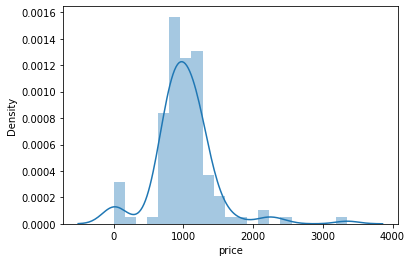

In [95]:
#start to look at the distributions
from matplotlib import figure
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(eb_rooms['price']);

In [98]:
pd.options.display.max_colwidth = 100
cheap_berkeley = eb_rooms[(eb_rooms['price'] < 1000) & (eb_rooms['neighborhood'] == 'berkeley')]
cheap_berkeley

,posted,neighborhood,post title,URL,price
16,2022-02-21 16:04:00,berkeley,Sublet in beautiful craftsman home (Elmwood),https://sfbay.craigslist.org/eby/roo/d/berkeley-sublet-in-beautiful-craftsman/7449172795.html,950
